In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\86178\Downloads\bike.csv")

         id  city  hour  is_workday  weather  temp_air  temp_body  wind    y
0         1     0    22           1        2       3.0        0.7     0   15
1         2     0    10           1        1      21.0       24.9     3   48
2         3     0     0           1        1      25.3       27.4     0   21
3         4     0     7           0        1      15.7       16.2     0   11
4         5     1    10           1        1      21.1       25.0     2   39
...     ...   ...   ...         ...      ...       ...        ...   ...  ...
9995   9996     0     4           0        2       8.3        7.3     0    2
9996   9997     1     5           0        1      22.3       22.2     0    1
9997   9998     1     0           0        1       9.6        9.7     0   11
9998   9999     0    18           0        2      27.4       29.7     1  105
9999  10000     0     9           1        2       3.2       -2.1     2   48

[10000 rows x 9 columns]


In [12]:
# 删除 'id' 列  
df1= df.drop(columns=['id'])  

# 查看剔除后的数据集  
print("剔除 'id' 列后的数据集：")  
print(df1.head())  

剔除 'id' 列后的数据集：
   city  hour  is_workday  weather  temp_air  temp_body  wind   y
0     0    22           1        2       3.0        0.7     0  15
1     0    10           1        1      21.0       24.9     3  48
2     0     0           1        1      25.3       27.4     0  21
3     0     7           0        1      15.7       16.2     0  11
4     1    10           1        1      21.1       25.0     2  39


In [30]:
# 筛选出上海市的数据（城市代号为 1）  
data = df1[df1['city'] == 1]  

# 删除 'city' 列  
data = data.drop(columns=['city'])  

# 查看筛选和剔除后的数据集  
print("上海市的数据，剔除 'city' 列：")  
print(data.head())  

上海市的数据，剔除 'city' 列：
    hour  is_workday  weather  temp_air  temp_body  wind   y
4     10           1        1      21.1       25.0     2  39
5      0           1        1      20.4       18.2     0  12
9      4           1        3      17.4       18.0     3   2
10     0           1        1      14.9       15.3     2   6
11     8           0        1      25.0       28.1     0  25


In [31]:
# 将 hour 列中的时间进行简化处理  
data['hour'] = data['hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)  

# 查看处理后的数据集  
print("简化后的数据集：")  
print(data.head())  

简化后的数据集：
    hour  is_workday  weather  temp_air  temp_body  wind   y
4      1           1        1      21.1       25.0     2  39
5      0           1        1      20.4       18.2     0  12
9      0           1        3      17.4       18.0     3   2
10     0           1        1      14.9       15.3     2   6
11     1           0        1      25.0       28.1     0  25


In [32]:
import pandas as pd  
import numpy as np  
# 提取 y 列并转换为 NumPy 列向量  
y = data['y'].values.reshape(-1, 1)  

# 剔除 y 列  
data = data.drop(columns=['y'])  

# 查看提取出的 y 列向量及剔除后的数据集  
print("提取出的 y 列（单车租用数量）作为 NumPy 列向量：")  
print(y[:5])  # 打印前5个值以确认  
print("剔除 y 列后的数据集：")  
print(data.head())

提取出的 y 列（单车租用数量）作为 NumPy 列向量：
[[39]
 [12]
 [ 2]
 [ 6]
 [25]]
剔除 y 列后的数据集：
    hour  is_workday  weather  temp_air  temp_body  wind
4      1           1        1      21.1       25.0     2
5      0           1        1      20.4       18.2     0
9      0           1        3      17.4       18.0     3
10     0           1        1      14.9       15.3     2
11     1           0        1      25.0       28.1     0


In [34]:
# 将 DataFrame 转换为 NumPy 数组  
numpy_array = data.to_numpy()  

# 打印转换后的 NumPy 数组的前几行以进行确认  
print("转换后的 NumPy 数组，打印前5行以确认：")  
print(numpy_array[:5])  # 打印前5行  

转换后的 NumPy 数组，打印前5行以确认：
[[ 1.   1.   1.  21.1 25.   2. ]
 [ 0.   1.   1.  20.4 18.2  0. ]
 [ 0.   1.   3.  17.4 18.   3. ]
 [ 0.   1.   1.  14.9 15.3  2. ]
 [ 1.   0.   1.  25.  28.1  0. ]]


In [60]:
# 6. 请将DataFrame对象转换为Numpy数组，方便后续操作。
data_array = data.to_numpy()
y = data['y'].to_numpy()
data_array

array([[  0. ,  22. ,   1. , ...,   0.7,   0. ,  15. ],
       [  0. ,  10. ,   1. , ...,  24.9,   3. ,  48. ],
       [  0. ,   0. ,   1. , ...,  27.4,   0. ,  21. ],
       ...,
       [  1. ,   0. ,   0. , ...,   9.7,   0. ,  11. ],
       [  0. ,  18. ,   0. , ...,  29.7,   1. , 105. ],
       [  0. ,   9. ,   1. , ...,  -2.1,   2. ,  48. ]])

In [61]:
# 7. 请按照训练集与测试集8:2的比例将原始数据集划分。
from sklearn.model_selection import train_test_split
train_data, test_data, train_y, test_y = train_test_split(data_array, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
train_y = scaler.fit_transform(train_y.reshape(-1, 1))
test_y = scaler.transform(test_y.reshape(-1, 1))

In [63]:
model = LinearRegression()
model.fit(train_data, train_y)

LinearRegression()

In [68]:
test_y_pred = model.predict(test_data)
print(f"函数返回值为:{test_y_pred}")

函数返回值为:[[0.25101215]
 [0.17813765]
 [0.34412955]
 ...
 [0.12550607]
 [0.40080972]
 [0.22672065]]


In [67]:
# 计算均方误差  
mse = mean_squared_error(test_y, test_y_pred)  

# 计算根均方误差  
rmse = np.sqrt(mse)  

# 打印 RMSE 值  
print(f"RMSE: {rmse}")  

RMSE: 2.0073676729891854e-15


In [45]:
# 导入必要的库  
from sklearn import datasets  
from sklearn.model_selection import train_test_split  

# 1. 加载鸢尾花数据集  
iris = datasets.load_iris()  # 加载数据集  
X, y = iris.data, iris.target  # 特征和标签  

# 2. 划分数据集，训练集比例为 0.2，随机种子为 42  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# 输出训练集和测试集的形状  
print("训练集特征形状:", X_train.shape)  
print("测试集特征形状:", X_test.shape)  
print("训练集标签形状:", y_train.shape)  
print("测试集标签形状:", y_test.shape)

训练集特征形状: (120, 4)
测试集特征形状: (30, 4)
训练集标签形状: (120,)
测试集标签形状: (30,)


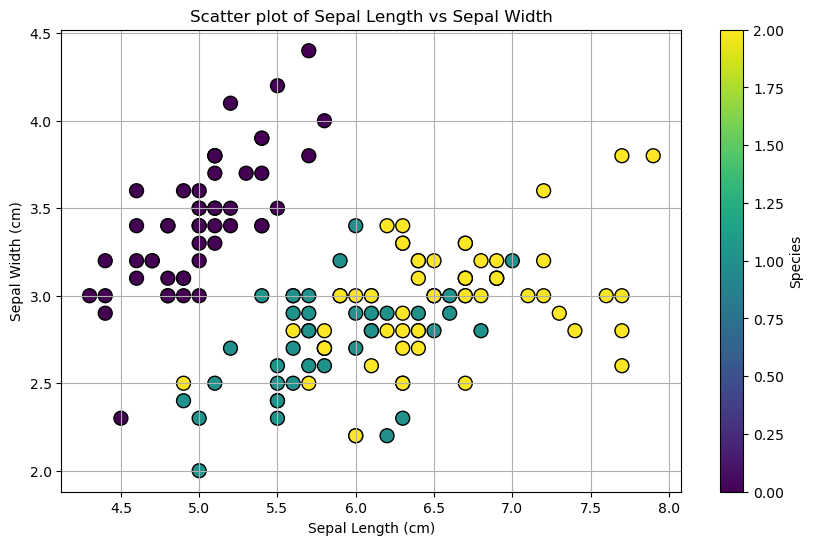

In [46]:
# 导入必要的库  
import matplotlib.pyplot as plt  
from sklearn import datasets  

# 1. 加载鸢尾花数据集  
iris = datasets.load_iris()  
X, y = iris.data, iris.target  

# 2. 选择花萼长度和花萼宽度  
# 花萼长度: X[:, 0]  
# 花萼宽度: X[:, 1]  
sepal_length = X[:, 0]  
sepal_width = X[:, 1]  

# 3. 绘制散点图  
plt.figure(figsize=(10, 6))  
plt.scatter(sepal_length, sepal_width, c=y, cmap='viridis', edgecolor='k', s=100)  
plt.title('Scatter plot of Sepal Length vs Sepal Width')  
plt.xlabel('Sepal Length (cm)')  
plt.ylabel('Sepal Width (cm)')  
plt.colorbar(label='Species')  
plt.grid()  
plt.show()

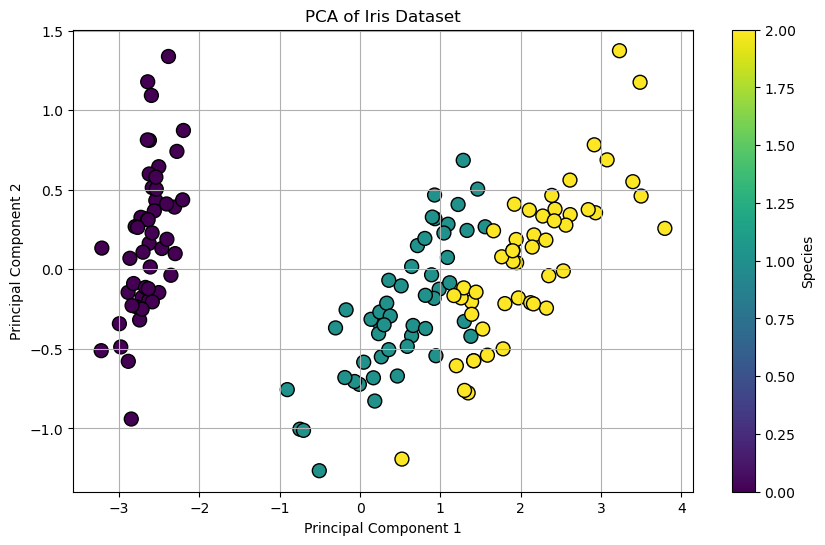

In [47]:
# 导入必要的库  
import matplotlib.pyplot as plt  
from sklearn import datasets  
from sklearn.decomposition import PCA  

# 1. 加载鸢尾花数据集  
iris = datasets.load_iris()  
X, y = iris.data, iris.target  

# 2. 使用PCA降维到2个主成分  
pca = PCA(n_components=2)  # 降维到两个主成分  
X_pca = pca.fit_transform(X)  # 对数据进行PCA变换  

# 3. 绘制降维结果的散点图  
plt.figure(figsize=(10, 6))  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)  
plt.title('PCA of Iris Dataset')  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.colorbar(label='Species')  
plt.grid()  
plt.show()

In [48]:
# 导入必要的库  
import numpy as np  
from sklearn import datasets  
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  

# 1. 加载鸢尾花数据集  
iris = datasets.load_iris()  
X, y = iris.data, iris.target  

# 2. 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# 3. 创建KNN分类器  
k = 3  
knn = KNeighborsClassifier(n_neighbors=k)  

# 4. 训练分类器  
knn.fit(X_train, y_train)  

# 5. 在测试集上进行预测  
y_pred = knn.predict(X_test)  

# 6. 评估模型  
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred))  
print("\n分类报告：\n", classification_report(y_test, y_pred))

混淆矩阵：
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
# 导入必要的库  
import numpy as np  
from sklearn import datasets  
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

# 1. 加载鸢尾花数据集  
iris = datasets.load_iris()  
X, y = iris.data, iris.target  

# 2. 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# 3. 创建KNN分类器  
k = 3  
knn = KNeighborsClassifier(n_neighbors=k)  

# 4. 训练分类器  
knn.fit(X_train, y_train)  

# 5. 在测试集上进行预测  
y_pred = knn.predict(X_test)  

# 6. 评估模型  
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred))  
print("\n分类报告：\n", classification_report(y_test, y_pred))  

# 7. 计算并输出分类准确率  
accuracy = accuracy_score(y_test, y_pred)  
print(f"分类准确率: {accuracy * 100:.2f}%")

混淆矩阵：
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

分类准确率: 100.00%
